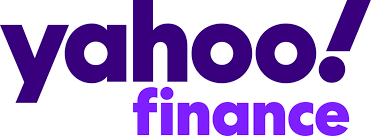

___

In [ ]:
student_1_full_name = ''
student_1_email     = ''
#---------------------------------
student_2_full_name = '' 
student_2_email     = '' 

---
### yfinance library

You can use **yfinance** in your project for downloading data from yahoo finance website. For more information on **yfinance** library go to https://pypi.org/project/yfinance/.

The **download** method returns the prices in Panda dataframe format. The first row of the returned df is the prices of the start date, and the last row is the prices of one day before the end date. The end date is not included in the returned df. For all sections, you can assume the end date refers to one day before the end day (start date up to the end date, end date is not included). See the example below.

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
ticker = 'MSFT'
start_date = '2023-11-06'
end_date = '2023-11-09'

df = yf.download(ticker, start_date, end_date, progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,353.450012,357.540009,353.350006,356.529999,354.511658,23828300
2023-11-07,359.399994,362.459991,357.630005,360.529999,358.489014,25833900
2023-11-08,361.679993,363.869995,360.549988,363.200012,361.143890,26767800


To get the stock closing price of company for a given date, we have:

In [3]:
ticker = 'MSFT'
start_date = '2019-11-04'
end_date = '2019-11-05'

df = yf.download(ticker, start_date, end_date, progress=False)
df['Adj Close']

Date
2019-11-04    138.315765
Name: Adj Close, dtype: float64

---
## Part 1
Explain each one of the following terms in one or two paragraphs:

### 1-a) What is a stock and ticker?

A stock represents ownership in a corporation, giving the stockholder a claim on part of the company's assets and earnings. Stocks are a type of security, and they come in two main types: common and preferred. Common stockholders typically have voting rights and may receive dividends, while preferred stockholders have a higher claim on assets and earnings but usually do not have voting rights.

A ticker symbol is a unique series of letters assigned to a security or stock for trading purposes. These symbols are used by stock exchanges to identify listed companies and other securities. For example, MSFT is the ticker symbol for Microsoft Corporation. Ticker symbols are essential for traders and investors to track and execute trades on specific stocks.



### 1-b) What is open, high, low, and close price of a stock?

Open Price: The price at which a stock first trades upon the opening of an exchange on a given trading day. It represents the starting price for the day and is determined by the previous day's closing price and any overnight market activity.

High Price: The highest price at which a stock trades during a given trading day. This price can fluctuate throughout the day as trades are executed.

Low Price: The lowest price at which a stock trades during a given trading day. Like the high price, the low price can change based on market activity throughout the day.

Close Price: The final price at which a stock trades during regular trading hours on a given day. The closing price is considered a significant indicator of a stock's value for that day and is often used for historical comparison.



### 1-c) What is a stock portfolio?

A stock portfolio is a collection of stocks that an individual or institutional investor owns. The composition of a portfolio can vary widely based on the investor's goals, risk tolerance, and investment strategy. A well-diversified portfolio typically includes a mix of stocks from different sectors, industries, and geographic regions to reduce risk and enhance potential returns. Portfolio management involves selecting the right mix of stocks, monitoring their performance, and making adjustments as needed to align with the investor's financial goals and market conditions.





---
Answer the following questions. For all parts, you must use **yfinance** library to get stock prices and use **Adj Close** price for calculation.


---
## Part 2 - Get stock return:

Write a Python code that calculates stock simple return for a given start date and end data. The formula for calculating simple return is as follows:


$$r = \frac{p_{d2} - p_{d1}}{p_{d1}}$$

Where:

    r is simple return 
    p of d1 is price at date d1
    p of d2 is price at date d2
    

In [ ]:
# inputs:
ticker = 'MSFT'
start_date = '2023-01-06'
end_date   = '2024-01-06'

In [ ]:
import yfinance as yf

def calculate_simple_return(ticker, start_date, end_date):

    # Download the stock data
    df = yf.download(ticker, start_date, end_date, progress=False)

    # Get the adjusted closing price on the start and end dates
    start_price = df['Adj Close'].iloc[0]
    end_price = df['Adj Close'].iloc[-1]

    # Calculate the simple return
    simple_return = (end_price - start_price) / start_price
    return simple_return

# Inputs
ticker = 'MSFT'
start_date = '2023-01-06'
end_date = '2024-01-06'

# Calculate and print the simple return
simple_return = calculate_simple_return(ticker, start_date, end_date)
print(f"The simple return for {ticker} from {start_date} to {end_date} is: {simple_return:.4f}")



---
## Part 3 - Get portfolio value: 

Write a Python code that takes a list of tickers, a list of ticker quantities, and a date. The code should return the total value of the portfolio for a given date.

Let's assume the we have the following portfolio:

    ['IBM', 'AAPL', 'MSFT'], [3, 5, 20] -> 3 IBM shares, 5 AAPL shares, 20 MSFT shares.

The value of the portfolio is:

the qty of stock 1 x price of stock 1 at the given date + qty of stock 2 x price of stock 2 at the given date + ...

In [ ]:
# inputs:
tickers = ['IBM', 'AAPL', 'MSFT']
ticker_quantities = [3, 5, 20]
target_date = '2019-11-05'

In [ ]:
import yfinance as yf

def get_portfolio_value(tickers, ticker_quantities, target_date):
    total_value = 0.0

    for ticker, quantity in zip(tickers, ticker_quantities):
    # Download the stock data for the specific date
        df = yf.download(ticker, start=target_date, end=target_date, progress=False)

        if df.empty:
            print(f"No data found for {ticker} on {target_date}")
         continue

        # Get the adjusted closing price on the target date
        adj_close_price = df['Adj Close'].iloc[0]

        # Calculate the value of the current stock
        stock_value = adj_close_price * quantity

        # Add the stock value to the total portfolio value
        total_value += stock_value

    return total_value

# Inputs
tickers = ['IBM', 'AAPL', 'MSFT']
ticker_quantities = [3, 5, 20]
target_date = '2019-11-05'

# Calculate and print the portfolio value
portfolio_value = get_portfolio_value(tickers, ticker_quantities, target_date)
print(f"The total value of the portfolio on {target_date} is: ${portfolio_value:.2f}")





---
## Part 4 - portfolio graph: 

Write a Python code that generates a graph for the list of tickers given below. Use stock Adj closing prices.

In [ ]:
# inputs:
tickers = ['GM', 'MSFT', 'F']
start_date = '2019-01-10'
end_date = '2020-01-10'

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_prices(tickers, start_date, end_date):
    plt.figure(figsize=(14, 7))

    for ticker in tickers:
        # Download the stock data
        df = yf.download(ticker, start=start_date, end=end_date, progress=False)

        # Plot the adjusted closing price
        plt.plot(df.index, df['Adj Close'], label=ticker)

    # Set the title and labels
    plt.title('Stock Adjusted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

# Inputs
tickers = ['GM', 'MSFT', 'F']
start_date = '2019-01-10'
end_date = '2020-01-10'

# Generate the stock price graph
plot_stock_prices(tickers, start_date, end_date)




---
## Part 5 - Optional & not graded - Get portfolio return: 


Write a Python code that takes a list of tickers, a list of ticker quantities, start date, and end date. The code should return the overall simple return on the portfolio.


In [ ]:
# inputs:
tickers = ['IBM', 'AAPL', 'MSFT']
ticker_quantities = [3, 5, 20]
start_date = '2019-11-05'
end_date = '2020-11-05'

In [ ]:
import yfinance as yf

def calculate_portfolio_simple_return(tickers, ticker_quantities, start_date, end_date):
    start_value = 0.0
    end_value = 0.0

    for ticker, quantity in zip(tickers, ticker_quantities):
        # Download the stock data for the start and end dates
df_start = yf.download(ticker, start=start_date, end=start_date, progress=False)
        df_end = yf.download(ticker, start=end_date, end=end_date, progress=False)

        if df_start.empty or df_end.empty:
            print(f"No data found for {ticker} on the specified dates")
            continue

        # Get the adjusted closing price on the start and end dates
        start_price = df_start['Adj Close'].iloc[0]
        end_price = df_end['Adj Close'].iloc[0]

        # Calculate the value of the current stock at the start and end dates
        start_value += start_price * quantity
        end_value += end_price * quantity

    # Calculate the overall simple return
    simple_return = (end_value - start_value) / start_value

    return simple_return

# Inputs
tickers = ['IBM', 'AAPL', 'MSFT']
ticker_quantities = [3, 5, 20]
start_date = '2019-11-05'
end_date = '2020-11-05'

# Calculate and print the overall simple return on the portfolio
portfolio_simple_return = calculate_portfolio_simple_return(tickers, ticker_quantities, start_date, end_date)
print(f"The overall simple return on the portfolio from {start_date} to {end_date} is: {portfolio_simple_return:.4f}")


